In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
# Lettura dei dati
# Usa delim_whitespace=True per interpretare correttamente le separazioni multiple
regioni = pd.read_csv(r"C:\Users\albaa\Desktop\DATA MINING UNIBO\CLUSTER\regioni.txt", 
                      delim_whitespace=True, header=0)
print(regioni)

       Regione  Indicepov  Crimini  Scolarizza  Dis_giov       Pil  Internet
0      Abruzzo       9.20      2.8        80.4      24.0   27703.0     48.10
1   Basilicata      26.50      4.0        84.6      38.3   10973.0     39.90
2     Calabria      29.60      2.6        78.3      31.8   33988.0     38.60
3     Campania      28.50      3.2        72.1      38.1   95087.0     45.30
4      EmiliaR       4.60      3.2        81.4      18.3  133035.0     50.80
5       Friuli       9.10      4.6        80.2      18.9   34856.0     49.60
6        Lazio       7.80      3.1        83.0      30.6  168907.0     51.50
7      Liguria       6.10      3.5        84.7      18.8   43440.0     42.30
8    Lombardia       5.10      3.2        74.1      18.5  310952.0     50.60
9       Marche       8.80      2.5        80.7      22.6   40396.0     53.00
10      Molise      18.30      1.9        78.7      27.1    6449.0     45.50
11    Piemonte       6.80      4.7        74.8      24.1  121563.0     46.20

C:\Users\albaa\AppData\Local\Temp\ipykernel_27408\2936519422.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  regioni = pd.read_csv(r"C:\Users\albaa\Desktop\DATA MINING UNIBO\CLUSTER\regioni.txt",


In [8]:
# Visualizziamo dimensioni, informazioni e statistiche (escludendo la prima colonna)
print("Dimensioni:", regioni.shape)

Dimensioni: (20, 7)


In [9]:
print('\nInfo:')
print(regioni.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Regione     20 non-null     object 
 1   Indicepov   20 non-null     float64
 2   Crimini     20 non-null     float64
 3   Scolarizza  20 non-null     float64
 4   Dis_giov    20 non-null     float64
 5   Pil         20 non-null     float64
 6   Internet    20 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.2+ KB
None


In [10]:
print('\nStatistiche escludendo la prima colonna:')
print(regioni.iloc[:,1:7].describe())



Statistiche escludendo la prima colonna:
       Indicepov    Crimini  Scolarizza   Dis_giov            Pil  Internet
count  20.000000  20.000000   20.000000  20.000000      20.000000  20.00000
mean   13.792500   3.550000   77.515000  25.320000   75134.200000  46.80250
std     9.404314   1.204159    5.458675   9.446726   74489.899453   4.67092
min     4.600000   1.900000   68.600000  10.200000    4183.000000  38.10000
25%     6.750000   2.800000   73.375000  18.450000   26063.500000  44.55000
50%     8.950000   3.200000   78.500000  23.300000   41918.000000  48.40000
75%    22.925000   4.075000   80.875000  32.000000  108392.250000  50.22500
max    29.600000   7.500000   87.600000  44.700000  310952.000000  53.00000


In [ ]:
#Selezione delle variabili quantitative (colonne 2-7)
quant = regioni.iloc[:,1:7]
quant

,Indicepov,Crimini,Scolarizza,Dis_giov,Pil,Internet
0,9.20,2.8,80.4,24.0,27703.0,48.10
1,26.50,4.0,84.6,38.3,10973.0,39.90
2,29.60,2.6,78.3,31.8,33988.0,38.60
3,28.50,3.2,72.1,38.1,95087.0,45.30
4,4.60,3.2,81.4,18.3,133035.0,50.80
5,9.10,4.6,80.2,18.9,34856.0,49.60
6,7.80,3.1,83.0,30.6,168907.0,51.50
7,6.10,3.5,84.7,18.8,43440.0,42.30
8,5.10,3.2,74.1,18.5,310952.0,50.60
9,8.80,2.5,80.7,22.6,40396.0,53.00


In [12]:
#Distanza euclidea sulle variabili quantitative originali
d_unscaled = pdist(quant, metric='euclidean')
d_unscaled


array([ 16730.01763597,   6285.04548114,  67384.00480967, 105332.00029478,
         7153.00220537, 141204.00022637,  15737.00283631, 283249.00016445,
        12693.0010364 ,  21254.00242025,  93860.00023626,  40589.00524268,
         5747.07107577,  58312.00706021,  76299.00039194,  10985.01232202,
         6558.00560918,  23520.00308631, 113827.00049852,  23015.00206822,
        84114.00112995, 122062.00413437,  23883.0166003 , 157934.00173145,
        32467.01235762, 299979.00179243,  29423.01272559,   4524.02909584,
       110590.00328217,  57319.00214056,  22477.00751768,  75042.00175855,
        93029.00512415,   5745.11306634,  10172.03866636,   6790.07811001,
       130557.0044299 ,  61099.00101957,  99047.00487678,    868.41192415,
       134919.00246604,   9452.04108698, 276964.00169542,   6408.05699179,
        27539.00359563,  87575.00373137,  34304.00167896,    538.33917747,
        52027.0013642 ,  70014.00595574,  17270.02982293,  12843.0315584 ,
        29805.01415366, 1

In [16]:
#Standardizzazione dei dati (centro e scala)
scaler = StandardScaler()
data_std = scaler.fit_transform(regioni.iloc[:,1:7])
data_std

array([[-0.50102596, -0.63902148,  0.54224653, -0.14336093, -0.65328836,
         0.28499887],
       [ 1.38634457,  0.38341289,  1.33165224,  1.40971582, -0.88371716,
        -1.51615005],
       [ 1.72454392, -0.80942721,  0.14754368,  0.70377184, -0.56672261,
        -1.80169805],
       [ 1.6045377 , -0.29821003, -1.01776949,  1.38799446,  0.27481767,
        -0.33002759],
       [-1.00287015, -0.29821003,  0.73020027, -0.76241949,  0.79749023,
         0.8780601 ],
       [-0.51193562,  0.89463008,  0.50465579, -0.69725543, -0.55476731,
         0.61447733],
       [-0.65376115, -0.38341289,  1.03092625,  0.57344372,  1.29156924,
         1.03181672],
       [-0.83922531, -0.04260143,  1.35044761, -0.70811611, -0.43653654,
        -0.98898452],
       [-0.94832187, -0.29821003, -0.64186202, -0.74069814,  3.24801026,
         0.83412964],
       [-0.54466459, -0.89463008,  0.59863266, -0.2954104 , -0.47846274,
         1.36129518],
       [ 0.49175276, -1.40584727,  0.22272518,  0.

In [33]:
# Verifichiamo la media delle variabili standardizzate (dovrebbero essere vicine a 0), usiamo l'arrotondamento 
print("Medie delle variabili standardizzate:\n", np.round(np.mean(data_std, axis=0), decimals=8))

Medie delle variabili standardizzate:
 Indicepov    -0.0
Crimini       0.0
Scolarizza   -0.0
Dis_giov      0.0
Pil           0.0
Internet     -0.0
dtype: float64


In [25]:
# Calcoliamo anche la matrice di covarianza
data_std = (quant - quant.mean()) / quant.std(ddof=1)
print('Matrice di covarianza standardizzate:\n', np.cov(data_std, rowvar=False))

Matrice di covarianza standardizzate:
 [[ 1.         -0.05141485 -0.39004071  0.85126919 -0.32698544 -0.69024178]
 [-0.05141485  1.         -0.30118701 -0.20751215 -0.08944574  0.16279716]
 [-0.39004071 -0.30118701  1.         -0.28449256 -0.12446453  0.15236912]
 [ 0.85126919 -0.20751215 -0.28449256  1.         -0.13688061 -0.53348084]
 [-0.32698544 -0.08944574 -0.12446453 -0.13688061  1.          0.27327028]
 [-0.69024178  0.16279716  0.15236912 -0.53348084  0.27327028  1.        ]]


In [34]:
#Calcolo della distanza euclidea sui dati standardizzati
dist_std = pdist(data_std, metric='euclidean')
dist_std

array([3.22381514, 3.11553371, 3.16851607, 1.75524594, 1.62472974,
       2.21865142, 1.71948704, 4.08864099, 1.10380725, 1.4459876 ,
       2.31527566, 3.25940785, 3.61438577, 4.0071265 , 1.93191006,
       4.40777188, 1.45204074, 2.05105907, 1.95227103, 1.85438736,
       2.8883358 , 4.33831706, 3.5991736 , 3.99069587, 3.09728662,
       5.9310907 , 4.04825163, 2.79581782, 3.7725319 , 2.86382453,
       3.42079001, 3.1182445 , 4.05288888, 5.49608347, 3.6644069 ,
       4.36671628, 4.62997091, 2.17418277, 4.27433514, 3.87845325,
       4.14865841, 3.27335485, 5.48034988, 3.94362685, 2.08650228,
       3.74490113, 1.70624499, 3.4055712 , 2.28224784, 4.01509342,
       5.84651937, 3.81900341, 3.83198628, 4.26536547, 3.92433062,
       3.66622965, 3.49476936, 4.01630546, 4.5072856 , 3.62724818,
       2.56465156, 3.07903844, 1.84179101, 1.73066791, 1.43866365,
       3.52354289, 5.29064884, 4.32073773, 3.41958085, 3.91721881,
       1.85370531, 1.46910364, 2.28342424, 2.73830815, 1.59044

In [36]:
# Cluster gerarchico con il metodo Ward
Clust = linkage(dist_std, method='ward')
print('Passaggi di fusione:\n', Clust)

# I cluster sono bilanciati rispetto ai gruppi geografici
#Passaggi di fusione coerenti Analizzando i dati di fusione, vediamo che i cluster si formano inizialmente con distanze inferiori a 2, 
#ma man mano che si aggregano le distanze aumentano, fino a un massimo di 9.40 per l'ultima fusione.

Passaggi di fusione:
 [[ 4.         19.          0.75374959  2.        ]
 [11.         15.          1.0174118   2.        ]
 [ 0.          9.          1.10380725  2.        ]
 [12.         14.          1.30911175  2.        ]
 [ 5.         21.          1.64560165  3.        ]
 [17.         22.          1.66738072  3.        ]
 [ 3.         13.          1.73066791  2.        ]
 [ 1.          2.          1.85438736  2.        ]
 [ 6.         20.          1.9642891   3.        ]
 [10.         25.          2.20163706  4.        ]
 [ 7.         29.          2.40530829  5.        ]
 [18.         24.          2.4087908   4.        ]
 [23.         26.          2.77472052  4.        ]
 [ 8.         28.          3.12578446  4.        ]
 [27.         32.          3.79159495  6.        ]
 [16.         31.          3.86703617  5.        ]
 [30.         33.          5.10612856  9.        ]
 [35.         36.          5.47376799 14.        ]
 [34.         37.          9.40290257 20.        ]]


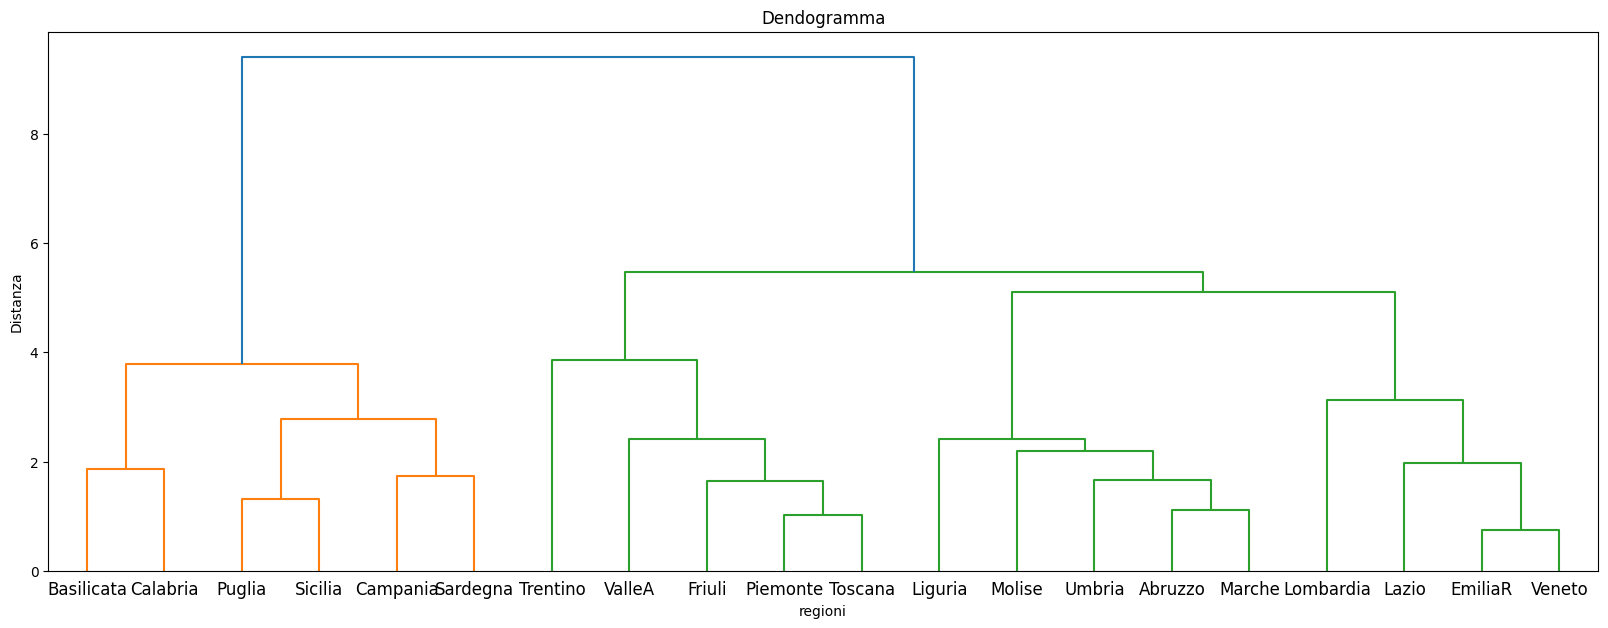

In [39]:
# Visualizzazione del dendrogramma con le etichette (nome delle regioni, supponendo sia la prima colonna)
plt.figure(figsize=(20, 7))
dendrogram(Clust, labels = regioni.iloc[:,0].values)
plt.title('Dendogramma')
plt.xlabel('regioni')
plt.ylabel('Distanza')
plt.show()


In [64]:
#Scelta del numero dei gruppi
#Estraiamo le altezze ovvero le distanze di fusione tra i grupppi
alt = Clust[:,2]
alt

array([0.75374959, 1.0174118 , 1.10380725, 1.30911175, 1.64560165,
       1.66738072, 1.73066791, 1.85438736, 1.9642891 , 2.20163706,
       2.40530829, 2.4087908 , 2.77472052, 3.12578446, 3.79159495,
       3.86703617, 5.10612856, 5.47376799, 9.40290257])

In [65]:
# Aggiungiamo uno zero in testa e calcoliamo la differenza tra fusioni successive
alt_diff = np.round(np.diff(np.insert(Clust, 0,0)), 3)
alt_diff
max_diff = np.argmax(alt_diff)

print('incrementi delle altezza: \n', alt_diff)
print('massimo incremento:' , alt_diff[max_diff])
print('Indice di massimo incremento', max_diff)

#Questo significa che a questo punto specifico della fusione, c'è stato un aumento drastico della distanza tra i cluster uniti. Di solito, 
# questo punto indica il numero ottimale di cluster perché dopo questa soglia, si stanno unendo gruppi molto dissimili tra loro.
#avendo come incremento massimo di fusione l'ultimo, teniamo due gruppi


incrementi delle altezza: 
 [  4.     15.    -18.246   1.246   9.      4.    -13.983   0.983  -2.
   9.     -7.896   0.896  10.      2.    -12.691   0.691   3.     16.
 -19.354   1.354  14.      5.    -20.333   1.333   0.     10.    -11.269
   0.269  -1.      1.     -0.146   0.146   4.     14.    -18.036   1.036
   7.     15.    -22.798   1.798   3.     22.    -26.595   2.595  13.
   6.    -21.591   1.591  19.      3.    -23.225   1.225   4.     20.
 -24.874   0.874  23.      5.    -28.208   2.208  10.     15.    -27.133
   1.133  25.      3.    -27.894   3.894  26.      1.    -30.526   8.526
  20.      3.    -27.597  10.597]
massimo incremento: 26.0
Indice di massimo incremento 68


In [44]:
#aggregazione dei gruppi(cutree 2 gruppi)
Fin_clast = fcluster(Clust, 2, criterion='maxclust')


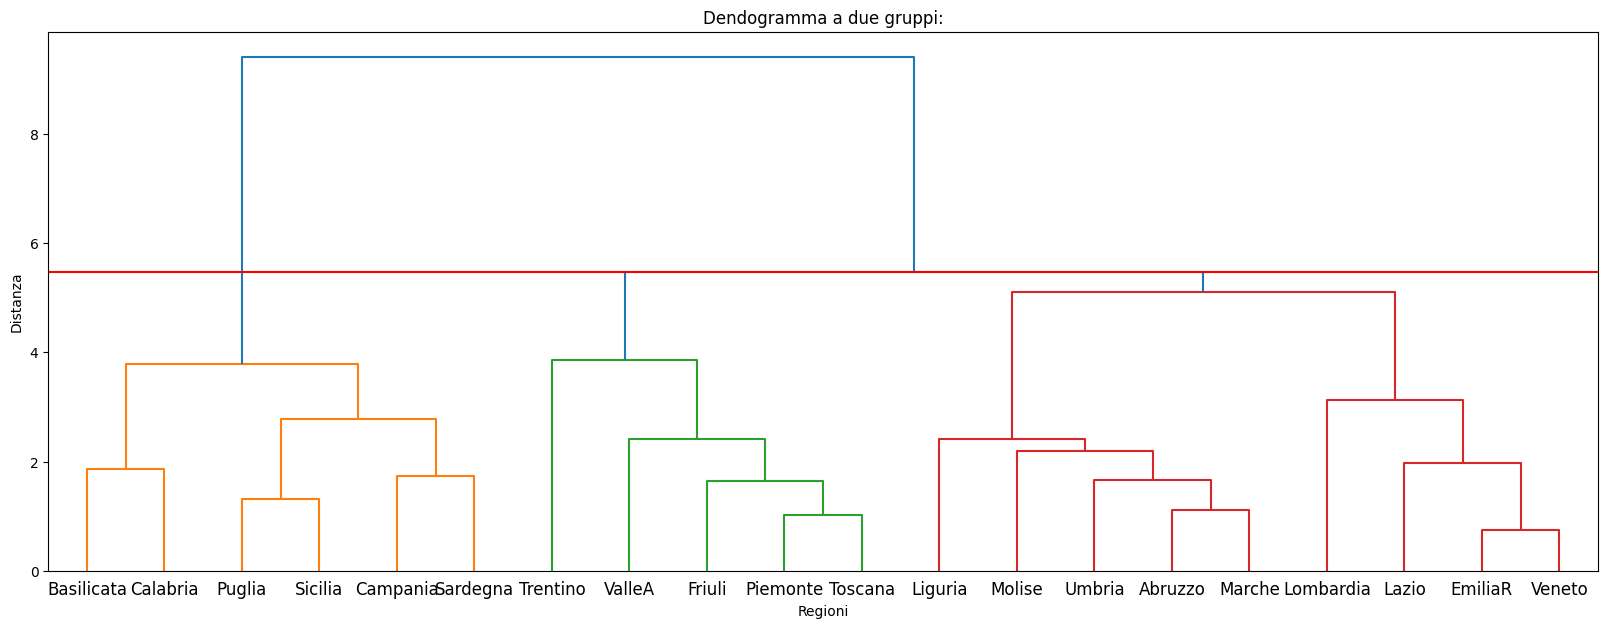

In [47]:
#dendogramma con i due greuppi
plt.figure(figsize=(20,7))
ddata = dendrogram(Clust, labels = regioni.iloc[:,0].values, color_threshold=Clust[-2,2] )
plt.title('Dendogramma a due gruppi:')
plt.xlabel('Regioni')
plt.ylabel('Distanza')

# Aggiungiamo una linea orizzontale per indicare il taglio
plt.axhline(y=Clust[-2,2], color='r')
plt.show()

In [49]:
# Valutazione della classificazione
# Aggiungiamo la colonna con il cluster di appartenenza al DataFram
regioni['Fin_clast'] = Fin_clast
print('Numero di regioni per cluster\n')
print(regioni['Fin_clast'].value_counts())

Numero di regioni per cluster

Fin_clast
2    14
1     6
Name: count, dtype: int64


In [53]:
# Statistiche descrittive per ogni gruppo
print('statistiche per cluster\n')
print(regioni.groupby('Fin_clast').describe())

statistiche per cluster

          Indicepov                                                         \
              count       mean       std   min     25%   50%     75%   max   
Fin_clast                                                                    
1               6.0  26.966667  2.882823  21.9  26.125  27.5  29.100  29.6   
2              14.0   8.146429  3.410192   4.6   6.225   7.7   9.025  18.3   

          Crimini            ...        Pil           Internet             \
            count      mean  ...        75%       max    count       mean   
Fin_clast                    ...                                            
1             6.0  3.500000  ...   81584.25   95087.0      6.0  41.866667   
2            14.0  3.571429  ...  130167.00  310952.0     14.0  48.917857   

                                                       
                std   min     25%    50%    75%   max  
Fin_clast                                              
1          4.539897  38.1  38.

In [56]:
#Visualizziamo il gruppo di appartenenza di ogni regione
member = pd.DataFrame({'Regione': regioni.iloc[:, 0], 'Cluster': Fin_clast})
print('Assegnazione per ogni regione:\n')
print(member)

Assegnazione per ogni regione:

       Regione  Cluster
0      Abruzzo        2
1   Basilicata        1
2     Calabria        1
3     Campania        1
4      EmiliaR        2
5       Friuli        2
6        Lazio        2
7      Liguria        2
8    Lombardia        2
9       Marche        2
10      Molise        2
11    Piemonte        2
12      Puglia        1
13    Sardegna        1
14     Sicilia        1
15     Toscana        2
16    Trentino        2
17      Umbria        2
18      ValleA        2
19      Veneto        2


In [57]:
#Calcolo e visualizzazione della slihouette
#Utilizziamo i dati standardizzati e il cluster ottenuto 
silhoutte_avg = silhouette_score(data_std, Fin_clast, metric='euclidean')
print('Silohouette media:\n', silhoutte_avg)

Silohouette media:
 0.35238152714050985


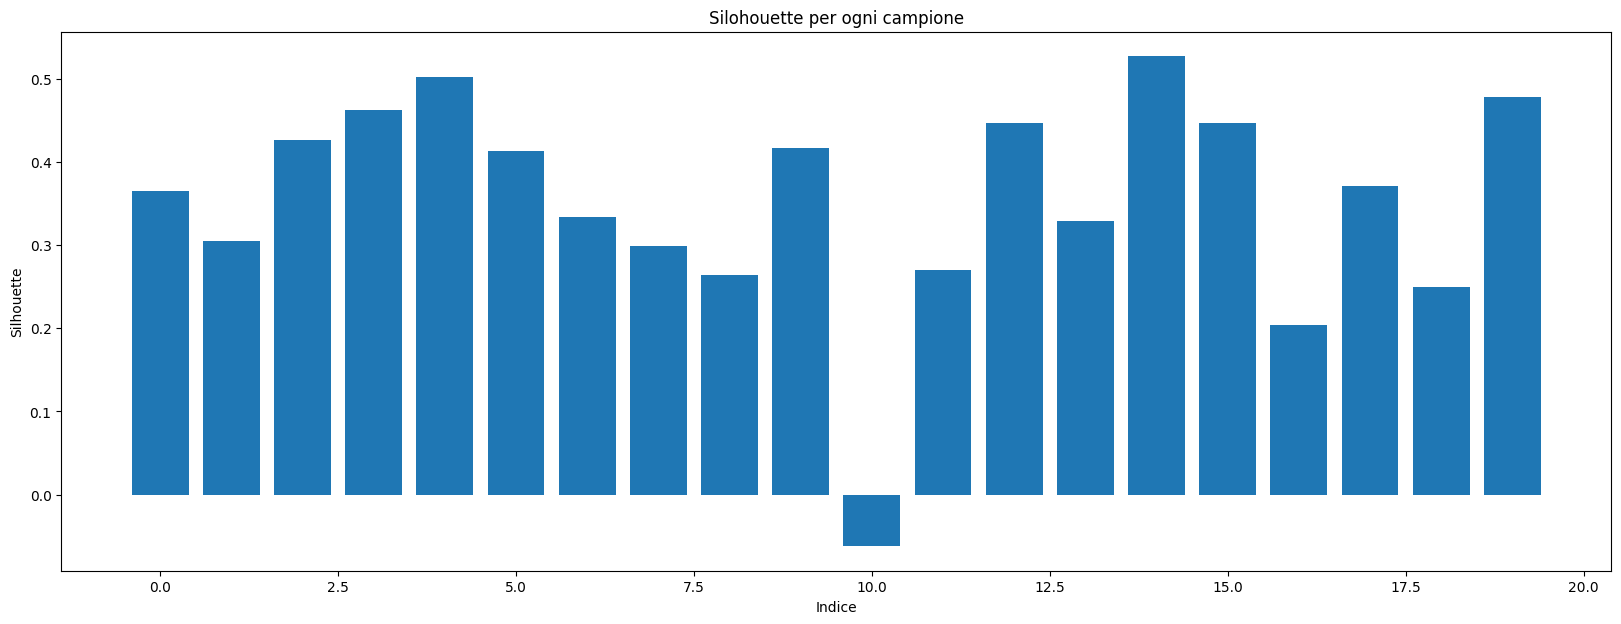

In [63]:
#Valutiamolo per ogni campione
sil_values = silhouette_samples(data_std, Fin_clast, metric = 'euclidean')

#grafico di silhouette
plt.figure(figsize=(20,7))
plt.bar(range(len(sil_values)), sil_values)
plt.title('Silohouette per ogni campione')
plt.xlabel('Indice')
plt.ylabel('Silhouette')
plt.show()